<a href="https://colab.research.google.com/github/utkuyucel/Deep-Learning/blob/master/Scaled_Regression_and_Forecasting_with_DOCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import sys
import numpy as np
import tensorflow as tf

from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
df = pd.read_excel("inflation.xlsx", usecols = ["oran"])
# df = pd.read_csv("EREGL.csv", usecols = ["Close"])
# df = pd.read_excel("syn.xlsx")
df.head()

,oran
0,6.40
1,10.45
2,6.16
3,7.40
4,8.17


In [5]:
df.tail()

,oran
7,11.92
8,20.30
9,11.84
10,14.60
11,36.00


In [6]:
df.isnull().sum()

oran    0
dtype: int64

In [7]:
df = df.dropna(axis = 0)
df.isnull().sum()

oran    0
dtype: int64

In [8]:
df

,oran
0,6.40
1,10.45
2,6.16
3,7.40
4,8.17
5,8.81
6,8.53
7,11.92
8,20.30
9,11.84


In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_y = scaler.fit_transform(df["oran"].values.reshape(-1, 1))

In [10]:
print("Y", df["oran"])
print("------------------")
print("SCaled Y", scaled_y)

Y 0      6.40
1     10.45
2      6.16
3      7.40
4      8.17
5      8.81
6      8.53
7     11.92
8     20.30
9     11.84
10    14.60
11    36.00
Name: oran, dtype: float64
------------------
SCaled Y [[0.0080429 ]
 [0.14376676]
 [0.        ]
 [0.04155496]
 [0.06735925]
 [0.08880697]
 [0.07942359]
 [0.19302949]
 [0.47386059]
 [0.19034853]
 [0.28284182]
 [1.        ]]


In [11]:
y = df["oran"].values
X = np.arange(1,(len(y) + 1))
print("Before Reshaping X:\n", X.shape)

X = np.reshape(X, (X.shape[0], 1))
print("After Reshaping X:\n", X.shape)

Before Reshaping X:
 (12,)
After Reshaping X:
 (12, 1)


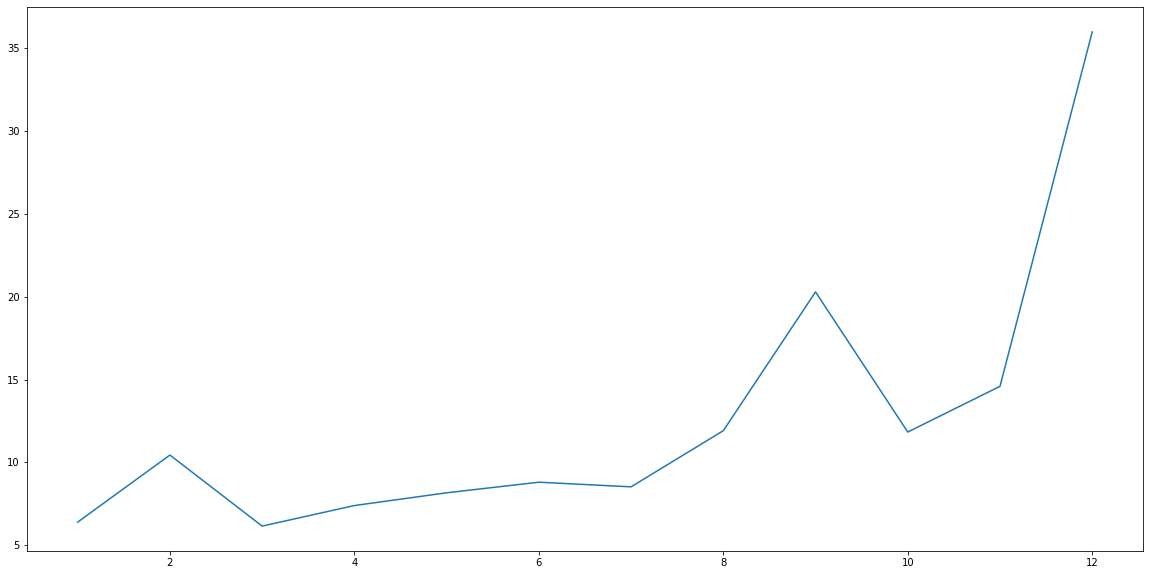

In [12]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

plt.figure(figsize= (20,10))
plt.plot(X, y)
plt.show()


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, scaled_y, test_size = 0.001, shuffle = False)

In [14]:
# Checking that all the data have the same shape

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (11, 1)
y_train shape:  (11, 1)
X_test shape:  (1, 1)
y_test shape:  (1, 1)


In [15]:
print(X_train)
print("------------")
print(X_test)
print("------------")
print(y_train)
print("------------")
print(y_test)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]
------------
[[12]]
------------
[[0.0080429 ]
 [0.14376676]
 [0.        ]
 [0.04155496]
 [0.06735925]
 [0.08880697]
 [0.07942359]
 [0.19302949]
 [0.47386059]
 [0.19034853]
 [0.28284182]]
------------
[[1.]]


In [16]:
print("Simple y_Train")
print(y_train)

print("*******************")

print("Raveled")
print(y_train.ravel())


Simple y_Train
[[0.0080429 ]
 [0.14376676]
 [0.        ]
 [0.04155496]
 [0.06735925]
 [0.08880697]
 [0.07942359]
 [0.19302949]
 [0.47386059]
 [0.19034853]
 [0.28284182]]
*******************
Raveled
[0.0080429  0.14376676 0.         0.04155496 0.06735925 0.08880697
 0.07942359 0.19302949 0.47386059 0.19034853 0.28284182]


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

KERNEL = "poly"

regr = svm.SVR(kernel = KERNEL) # 0.1828
#regr = svm.SVR(kernel = KERNEL, C = 1000.0)
# regr = svm.SVR(kernel = KERNEL)
#regr = LinearRegression() # 0.1946
#regr = RandomForestRegressor()
#regr = KNeighborsRegressor(3, weights= "distance")
# regr.fit(X, y)
regr.fit(X_train, y_train.ravel())

preds = regr.predict(X_test)

In [53]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

mse = mean_squared_error(y_test, preds)
print("MSE %f" % (mse))

RMSE: 0.567232
MSE 0.321752


In [39]:
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    sayi = self.params["epochs"]
    if(epoch % 100 == 0):

      sys.stdout.write(f"\r| Loss: {logs.get('loss')} | Epoch: {epoch} | Completed: % { int((epoch/sayi)*100) } | ")
      sys.stdout.flush()
      
    if(logs.get("loss") < 0.10):
      print("Model has < 0.10 Loss, training stopped.")
      self.model.stop_training = True

callbacks = myCallback()

In [79]:
# Some Deep Learning

regr = Sequential()
regr.add(Dense(8, input_shape = (1,), activation = "relu"))
regr.add(Dense(1))
regr.compile(optimizer = "adam", loss = "mse")

history = regr.fit(X_train, y_train, epochs = 10000, verbose = 0, batch_size = 512, callbacks = [callbacks])

mse = mean_squared_error(y_test, preds)
print("MSE %f" % (mse))

| Loss: 0.580096423625946 | Epoch: 100 | Completed: % 1 | Model has < 0.10 Loss, training stopped.
MSE 0.321752


In [80]:
a = (len(X) + 1)
ilk = regr.predict(np.array([[a]]))

print(f"{a} -> {ilk}")


13 -> [[1.0544066]]


In [81]:
a = (len(X) + 1)

last = regr.predict(np.array([[a]])).round(2).item()
print(a, "->", last)

last2 = regr.predict(np.array([[a+1]])).round(2).item()
print(a+1, '->',last2)

last3 = regr.predict(np.array([[a+2]])).round(2).item()
print(a+2, '->',last3)
#Checking that overfitted or not

13 -> 1.0499999523162842
14 -> 1.159999966621399
15 -> 1.2599999904632568


In [82]:
SAYI = 20
tam = []
for i in tqdm(range(a, SAYI+1)):
  three = regr.predict(np.array([[i]])).item()
  three = np.reshape(three, (-1,1))
  three = scaler.inverse_transform(three)
  tam.append(three)

100%|██████████| 8/8 [00:00<00:00, 18.04it/s]


In [83]:
print(tam)

[array([[37.62349422]]), array([[40.75501935]]), array([[43.8865338]]), array([[47.01805537]]), array([[50.14957338]]), array([[53.28108784]]), array([[56.41260941]]), array([[59.54412386]])]


In [84]:
def transform(a: list):
  new_list = []
  
  for i in a:
    i = i.reshape(-1).astype(int)
    i = i[0]
    new_list.append(i)
  
  return new_list

tam = transform(tam)

print(tam)

[37, 40, 43, 47, 50, 53, 56, 59]


In [85]:
fig = go.Figure(data=go.Scatter(x=[x for x in range(a, SAYI)], y=tam))
fig.show()

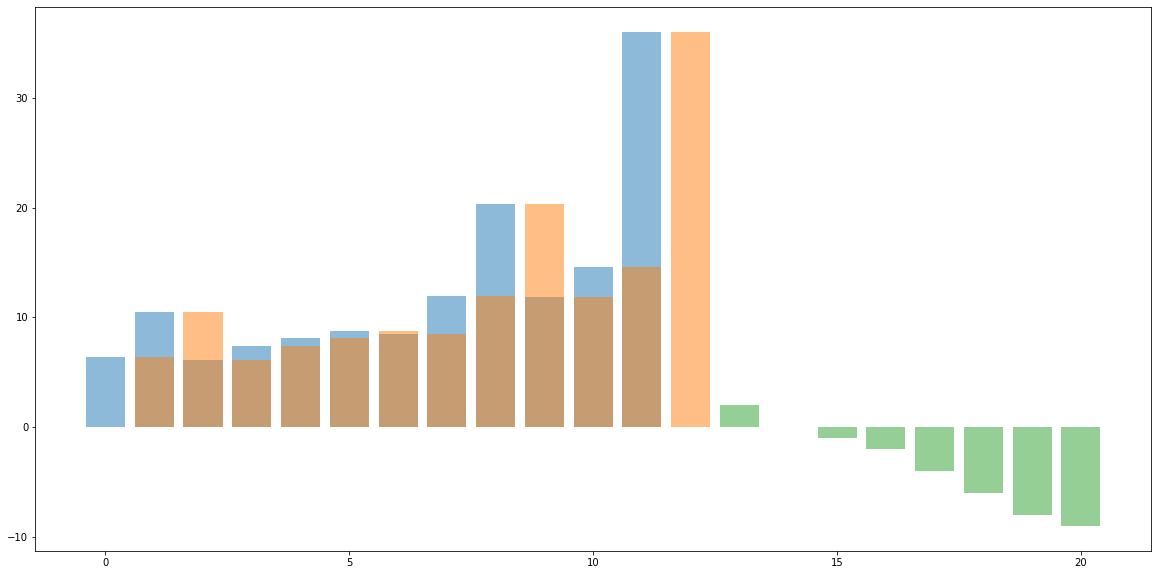

In [75]:
plt.figure(figsize= (20,10))
plt.bar(range(len(X)), y, align='center', alpha=0.5)
plt.bar(range(1, a), y, align='center', alpha=0.5)
plt.bar(range(a, SAYI+1), tam, align='center', alpha=0.5)
plt.show()

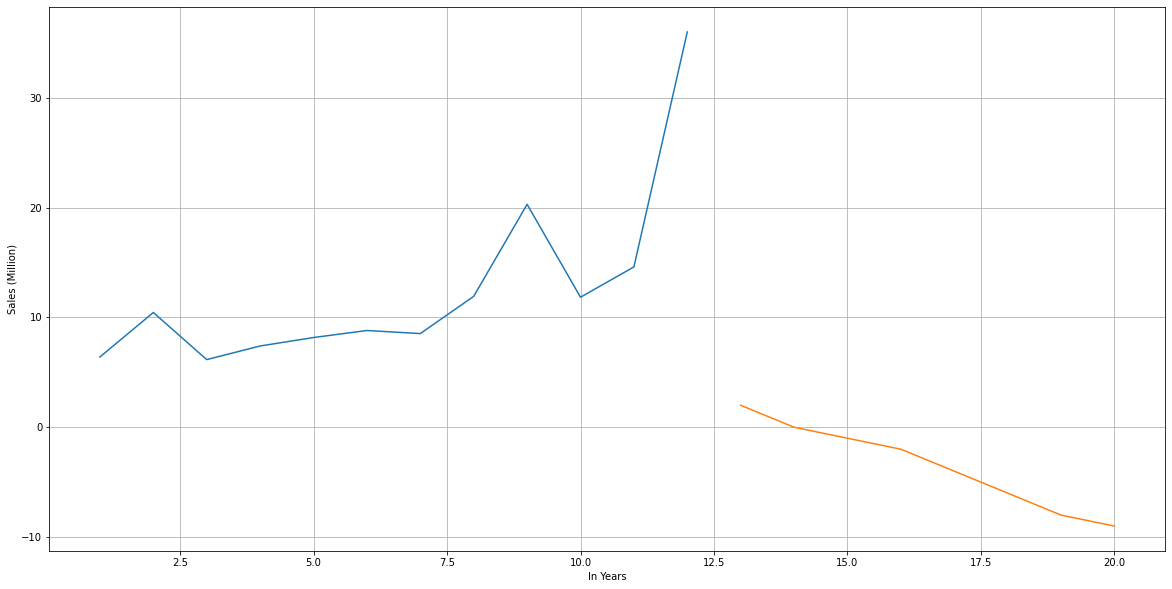

In [76]:
#Plot chart
plt.figure(figsize= (20,10))
plt.plot(range(1, a), y)
plt.plot(range(a, SAYI+1), [x for x in tam])
plt.xlabel("In Years")
plt.ylabel("Sales (Million)")

plt.grid(True)

plt.show()

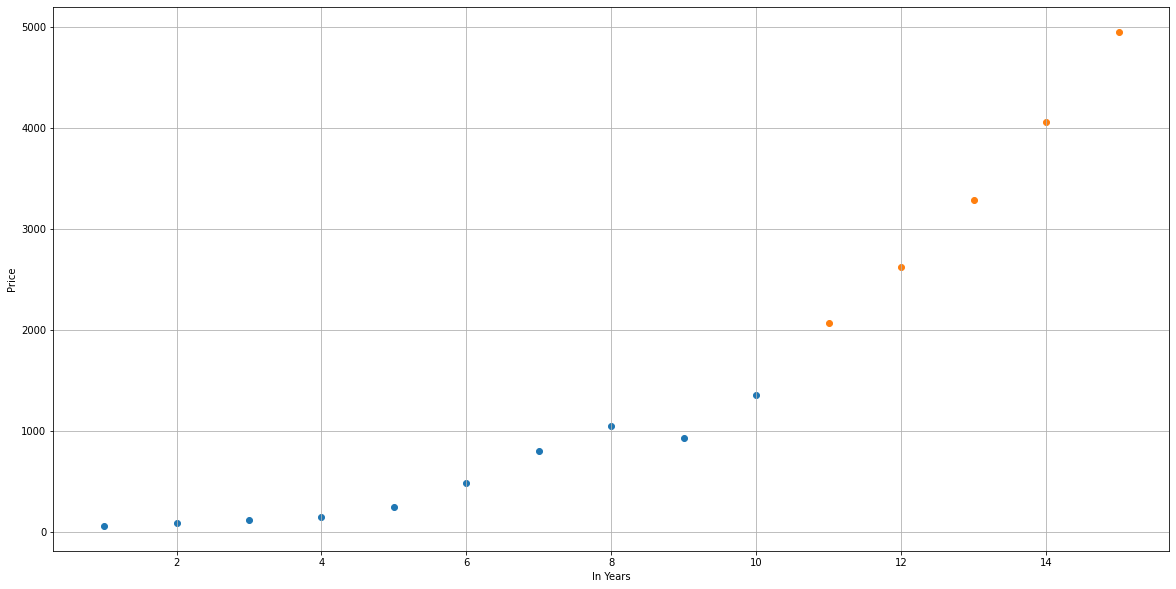

In [ ]:
#Plot chart
plt.figure(figsize= (20,10))
plt.scatter(range(1, a), y)
plt.scatter(range(a, SAYI+1), tam)
plt.xlabel("In Years")
plt.ylabel("Price")

plt.grid(True)

plt.show()